<a href="https://colab.research.google.com/github/tonyOpoku/DS_lists/blob/main/Projects/Project2_MakingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset.

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model
5.  Measure the performance of your model
6.  Summarize and interpret your results



**Action:** Import python libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## <font color='lightblue'>1. Data Understanding </font>

**Action:** Import your data into colaboratory.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_loans = pd.read_csv('/content/drive/MyDrive/loan.csv')
df_loans.head()

/tmp/ipython-input-3005102751.py:1: DtypeWarning:

Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

In [6]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [8]:
df_loans.isna().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
all_util,866007
total_rev_hi_lim,70276
inq_fi,866007
total_cu_tl,866007


In [11]:
cols=[ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'loan_status', 'purpose',
        'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d']
df_new = df_loans[cols]
df_new.head(6)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,Jan-2016
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-2013
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,Jan-2016
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,Jan-2015
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,Jan-2016
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03,Sep-2015


In [31]:
df_new.isna().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0


In [32]:
len(df_new)

886825

In [30]:
df_new = df_new.dropna(subset=["revol_util"]).copy()
df_new = df_new.dropna(subset=["last_credit_pull_d"]).copy()


In [20]:
df_new = df_new.copy()

# 1) Normalize to string and lowercase
emp = df_new["emp_length"].astype("string").str.strip().str.lower()

# 2) Turn common placeholders into real NA
emp = emp.replace({"n/a": pd.NA, "na": pd.NA, "nan": pd.NA})

# 3) Handle special forms then extract the number
emp = (emp
       .str.replace("< 1 year", "0", regex=False)
       .str.replace("10+ years", "10", regex=False)
       .str.replace("10+ year", "10", regex=False))

# 4) Extract the first integer found (works for "2 years", "7 years", etc.)
emp_num = pd.to_numeric(emp.str.extract(r"(\d+)")[0], errors="coerce")

# 5) Create features safely with .loc
df_new.loc[:, "emp_length_missing"] = emp_num.isna().astype(int)
df_new.loc[:, "emp_length_num"] = emp_num.fillna(-1).astype("Int8")

# --- (Optional) quick sanity checks ---
print("Missing rate (%):", df_new["emp_length_missing"].mean() * 100)
print(df_new["emp_length_num"].value_counts(dropna=False).sort_index())
df_new[["emp_length", "emp_length_num", "emp_length_missing"]].head()
df_new["emp_lt1yr"] = (df_new["emp_length_num"] == 0).astype(int)

Missing rate (%): 5.051392922302647
emp_length_num
-1.0      44825
 0.0      70605
 1.0      57095
 2.0      78870
 3.0      70026
 4.0      52529
 5.0      55704
 6.0      42950
 7.0      44594
 8.0      43955
 9.0      34657
 10.0    291569
Name: count, dtype: int64


In [24]:
df_new = df_new.drop(columns=["emp_length"], errors="ignore").copy()

In [37]:

df_new.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,emp_length_num,emp_length_missing,emp_lt1yr
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,5000.00,861.07,0.00,0.00,0.00,171.62,Jan-2016,10.0,0,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,456.46,435.17,0.00,117.08,1.11,119.66,Sep-2013,0.0,0,1
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,2400.00,603.65,0.00,0.00,0.00,649.91,Jan-2016,10.0,0,0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,10000.00,2209.33,16.97,0.00,0.00,357.48,Jan-2015,10.0,0,0
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,...,2233.10,1009.07,0.00,0.00,0.00,67.79,Jan-2016,1.0,0,0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,...,5000.00,631.38,0.00,0.00,0.00,161.03,Sep-2015,3.0,0,0
6,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,RENT,47004.0,...,5110.85,3025.99,0.00,0.00,0.00,170.08,Jan-2016,8.0,0,0
7,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,RENT,48000.0,...,3000.00,938.14,0.00,0.00,0.00,111.34,Dec-2014,9.0,0,0
8,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,OWN,40000.0,...,162.02,294.94,0.00,189.06,2.09,152.39,Aug-2012,4.0,0,0
9,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,RENT,15000.0,...,673.48,533.42,0.00,269.29,2.52,121.45,Mar-2013,0.0,0,1


In [38]:
df_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'emp_length_num',
       'emp_length_missing', 'emp_lt1yr'],
      dtype='object')

In [45]:
#df_new.to_csv("loan_clean.csv", index=False)
#from google.colab import files
#files.download("loan_clean.csv")
df_new['loan_status'].value_counts()


,count
loan_status,
Current,601504
Fully Paid,207556
Charged Off,45195
Late (31-120 days),11581
Issued,8457
In Grace Period,6251
Late (16-30 days),2355
Does not meet the credit policy. Status:Fully Paid,1953
Default,1218


**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

In [40]:
df_new.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,emp_length_num,emp_length_missing,emp_lt1yr
count,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000,8.868250e+05,886825.000000,886825.000000,886825.000000,886825.000000,...,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000,886825.000000
mean,14757.031150,14743.640572,14704.406704,13.245749,436.759991,7.501931e+04,18.159479,0.314282,0.694700,11.552218,...,7521.628541,5757.906695,1754.909752,0.396055,45.901368,4.876068,2164.118438,5.654800,0.050525,0.079533
std,8434.403029,8428.838941,8440.846047,4.381672,244.148718,6.468853e+04,17.194335,0.861916,0.998436,5.315827,...,7846.039817,6625.378597,2095.388737,4.084916,409.653692,63.094360,4794.506067,3.888099,0.219026,0.270569
min,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.850000,4.500000e+04,11.910000,0.000000,0.000000,8.000000,...,1900.440000,1200.570000,441.530000,0.000000,0.000000,0.000000,280.170000,2.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.660000,0.000000,0.000000,11.000000,...,4863.000000,3215.560000,1073.480000,0.000000,0.000000,0.000000,462.800000,6.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,14.000000,...,10567.060000,8000.000000,2238.470000,0.000000,0.000000,0.000000,831.130000,10.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,90.000000,...,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,10.000000,1.000000,1.000000


In [55]:
df_final = df_new.copy()

good = {
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid",
}
bad = {
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Charged Off",
}

df_final = df_final[df_final["loan_status"].isin(good | bad)].copy()
df_final["default_flag"] = df_final["loan_status"].isin(bad).astype("uint8")

print(df_final["default_flag"].value_counts())
print(df_final["default_flag"].value_counts(normalize=True))  # class balance


default_flag
0    209509
1     47168
Name: count, dtype: int64
default_flag
0    0.816236
1    0.183764
Name: proportion, dtype: float64


In [58]:
if "term" in df_final.columns:
    df_final["term_num"] = (
        df_final["term"].astype(str).str.extract(r"(\d+)", expand=False).astype("Int16")
    )

In [59]:
col = [
    "out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
    "total_rec_prncp","total_rec_int","total_rec_late_fee",
    "recoveries","collection_recovery_fee","last_pymnt_amnt"
]
df_final = df_final.drop(columns= col).copy()
df_final.head()




KeyError: "['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt'] not found in axis"

In [60]:
df_final.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_credit_pull_d',
       'emp_length_num', 'emp_length_missing', 'emp_lt1yr', 'default_flag',
       'term_num'],
      dtype='object')

In [61]:
df_final.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,emp_length_num,emp_length_missing,emp_lt1yr,default_flag,term_num
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,...,13648.0,83.7,9.0,f,Jan-2016,10.0,0,0,0,36
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,...,1687.0,9.4,4.0,f,Sep-2013,0.0,0,1,1,60
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,...,2956.0,98.5,10.0,f,Jan-2016,10.0,0,0,0,36
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,...,5598.0,21.0,37.0,f,Jan-2015,10.0,0,0,0,36
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,...,7963.0,28.3,12.0,f,Sep-2015,3.0,0,0,0,36


## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

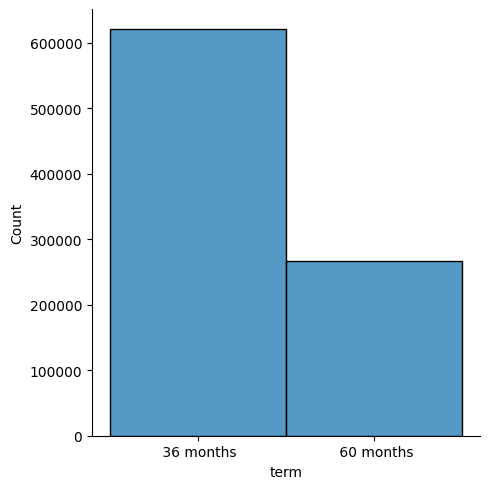

In [41]:
sns.displot(df_new,x='term', binwidth=10)

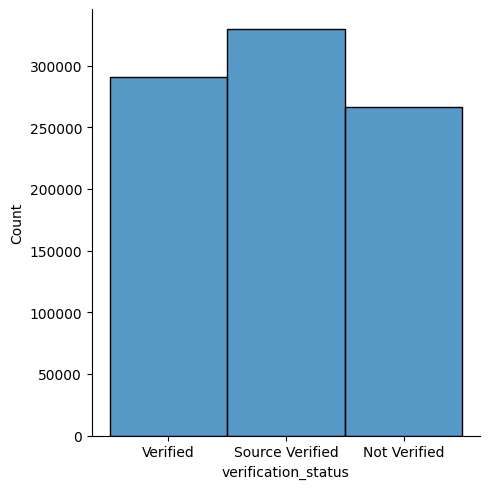

In [42]:

sns.displot(df_new,x='verification_status', binwidth=10)

<Axes: xlabel='grade', ylabel='default_flag'>

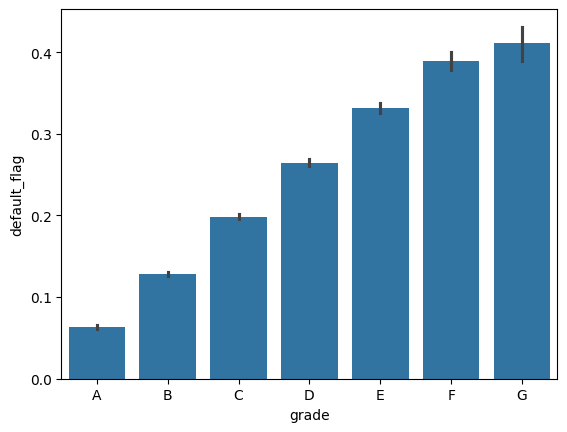

In [67]:
sns.barplot(data=df_final, x="grade", y="default_flag", estimator=np.mean, order=sorted(df_final["grade"].unique()))

**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1*

<Axes: xlabel='default_flag', ylabel='count'>

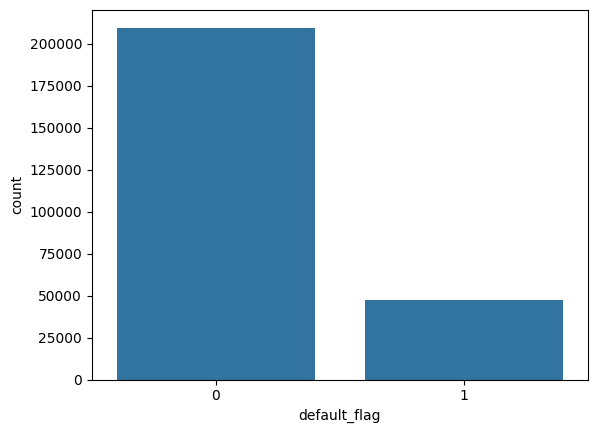

In [66]:
sns.countplot(data=df_final, x="default_flag")

## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

**Action:** Split your data into training and testing datasets *Marks: 1*

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

## <font color='lightblue'>5. Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:**
> What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*

> What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*

> How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*